In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import random

In [2]:
df = pd.read_csv('../data/clean/dataset.csv')

In [3]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny
53620,la_depeche,https://www.ladepeche.fr/2024/10/04/de-tout-un...,"De tout, un peu",NaN,0


In [4]:
df = df.fillna('')

In [5]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny


In [6]:
df

,name,url,title,lemmes,funny
0,liberation,https://www.liberation.fr/international/ameriq...,"A New York, la mairie veut rendre la Ve Avenue...",new york mairie vouloir ve avenue pieton,0
1,liberation,https://www.liberation.fr/forums/vers-une-resp...,Vers une responsabilité sociale et environneme...,responsabilite social environnemental musee,0
2,liberation,https://www.liberation.fr/international/ameriq...,Présidentielle américaine 2024 : à la frontièr...,presidentielle americain frontiere mexicain es...,0
3,liberation,https://www.liberation.fr/forums/mal-logement-...,Mal-logement : «Les luttes des habitants sont ...,mal-logement lutte habitant revendication ecol...,0
4,liberation,https://www.liberation.fr/culture/musique/waru...,"Warum Joe, punk canal historique",warum joe punk canal historique,0
...,...,...,...,...,...
102080,le_parisien,https://www.leparisien.fr/international/etats-...,« Nous avons désormais une chance de gagner »...,desormais chance gagner apres retrait biden de...,0
102081,le_parisien,https://www.leparisien.fr/jo-paris-2024/handba...,"JO Paris 2024, handball : pourquoi le tournoi ...",jo paris handball tournoi terminer lille paris,0
102082,le_parisien,https://www.leparisien.fr/jo-paris-2024/handba...,"JO Paris 2024, handball : quels sont les pays ...",jo paris handball pays titres palmares tournoi...,0
102083,le_parisien,https://www.leparisien.fr/jo-paris-2024/handba...,"JO Paris 2024, handball : le palmarès complet...",jo paris handball palmares complet equipe fran...,0


In [7]:
print(len(df))
print(len(df[df['funny'] == 0]))
print(len(df[df['funny'] == 0]) / len(df))
print(len(df[df['funny'] == 1]))
print(len(df[df['funny'] == 1]) / len(df))

102085
86795
0.8502228535044326
15290
0.14977714649556742


In [8]:
df['name'].unique()

array(['liberation', 'huffpost', 'ouest_france', 'actu_orange', 'europe1',
       'franceinfotv', 'le_monde', 'la_depeche', 'rfi', 'demotivateur',
       'le_parisien'], dtype=object)

In [9]:
df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,name,count
7,le_parisien,17996
9,ouest_france,16704
5,la_depeche,16440
3,franceinfotv,14142
4,huffpost,10307
6,le_monde,8565
10,rfi,7247
8,liberation,5999
1,demotivateur,2381
2,europe1,1704


In [10]:
for name in df['name'].unique():
    print("{:<15} {:>5}    {:>.5f}".format(name, len(df[df['name'] == name]), len(df[df['name'] == name])/len(df)))





liberation       5999    0.05876
huffpost        10307    0.10096
ouest_france    16704    0.16363
actu_orange       600    0.00588
europe1          1704    0.01669
franceinfotv    14142    0.13853
le_monde         8565    0.08390
la_depeche      16440    0.16104
rfi              7247    0.07099
demotivateur     2381    0.02332
le_parisien     17996    0.17628


In [11]:
for index, row in df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False).iterrows():
    print("{:<15} {:>5}    {:>.5f}".format(row['name'], row['count'], row['count']/len(df)))


le_parisien     17996    0.17628
ouest_france    16704    0.16363
la_depeche      16440    0.16104
franceinfotv    14142    0.13853
huffpost        10307    0.10096
le_monde         8565    0.08390
rfi              7247    0.07099
liberation       5999    0.05876
demotivateur     2381    0.02332
europe1          1704    0.01669
actu_orange       600    0.00588


In [12]:
df['lemmes'][:10]

0             new york mairie vouloir ve avenue pieton
1          responsabilite social environnemental musee
2    presidentielle americain frontiere mexicain es...
3    mal-logement lutte habitant revendication ecol...
4                      warum joe punk canal historique
5                edouard halfon tisser toile tarentule
6                                          ecran ecran
7                       demagogie chien mathieu lindon
8    michka assayas traffic decoller drogue jamais ...
9    moitie grand entreprise francais infraction cl...
Name: lemmes, dtype: object

In [13]:
' '.join(list(df['lemmes'][:10])).split()

['new',
 'york',
 'mairie',
 'vouloir',
 've',
 'avenue',
 'pieton',
 'responsabilite',
 'social',
 'environnemental',
 'musee',
 'presidentielle',
 'americain',
 'frontiere',
 'mexicain',
 'esperer',
 'pouvoir',
 'passer',
 'trump',
 'elire',
 'mal-logement',
 'lutte',
 'habitant',
 'revendication',
 'ecologique',
 'warum',
 'joe',
 'punk',
 'canal',
 'historique',
 'edouard',
 'halfon',
 'tisser',
 'toile',
 'tarentule',
 'ecran',
 'ecran',
 'demagogie',
 'chien',
 'mathieu',
 'lindon',
 'michka',
 'assayas',
 'traffic',
 'decoller',
 'drogue',
 'jamais',
 'retomber',
 'moitie',
 'grand',
 'entreprise',
 'francais',
 'infraction',
 'climatique']

In [14]:
Counter(' '.join(list(df['lemmes'][:10])).split()).most_common(5)

[('ecran', 2), ('new', 1), ('york', 1), ('mairie', 1), ('vouloir', 1)]

In [15]:
df.iloc[53620]

name                                             la_depeche
url       https://www.ladepeche.fr/2024/10/04/de-tout-un...
title                                       De tout, un peu
lemmes                                                     
funny                                                     0
Name: 53620, dtype: object

In [16]:
count_all = Counter(' '.join(list(df['lemmes'])).split()).most_common(50)
count_all

[('paris', 6885),
 ('jo', 5922),
 ('france', 4496),
 ('video', 4455),
 ('an', 4300),
 ('octobre', 2753),
 ('jeu', 2748),
 ('contre', 2500),
 ('nouveau', 2413),
 ('mort', 2160),
 ('apres', 2119),
 ('faire', 1908),
 ('etre', 1815),
 ('euro', 1802),
 ('guerre', 1791),
 ('grand', 1760),
 ('francais', 1735),
 ('monde', 1644),
 ('olympique', 1633),
 ('vouloir', 1561),
 ('homme', 1561),
 ('face', 1504),
 ('paralympique', 1493),
 ('femme', 1400),
 ('mettre', 1388),
 ('ministre', 1348),
 ('jour', 1294),
 ('enfant', 1277),
 ('football', 1277),
 ('gouvernement', 1270),
 ('jeune', 1225),
 ('vie', 1214),
 ('israel', 1191),
 ('etat', 1180),
 ('americain', 1174),
 ('medaille', 1155),
 ('prendre', 1154),
 ('samedi', 1139),
 ('heure', 1134),
 ('barnier', 1122),
 ('bleu', 1105),
 ('septembre', 1082),
 ('michel', 1077),
 ('temps', 1042),
 ('petit', 1038),
 ('prix', 1028),
 ('photos', 1020),
 ('pays', 1016),
 ('ligue', 993),
 ('equipe', 980)]

In [17]:
{ k: v  for k, v in count_all}

{'paris': 6885,
 'jo': 5922,
 'france': 4496,
 'video': 4455,
 'an': 4300,
 'octobre': 2753,
 'jeu': 2748,
 'contre': 2500,
 'nouveau': 2413,
 'mort': 2160,
 'apres': 2119,
 'faire': 1908,
 'etre': 1815,
 'euro': 1802,
 'guerre': 1791,
 'grand': 1760,
 'francais': 1735,
 'monde': 1644,
 'olympique': 1633,
 'vouloir': 1561,
 'homme': 1561,
 'face': 1504,
 'paralympique': 1493,
 'femme': 1400,
 'mettre': 1388,
 'ministre': 1348,
 'jour': 1294,
 'enfant': 1277,
 'football': 1277,
 'gouvernement': 1270,
 'jeune': 1225,
 'vie': 1214,
 'israel': 1191,
 'etat': 1180,
 'americain': 1174,
 'medaille': 1155,
 'prendre': 1154,
 'samedi': 1139,
 'heure': 1134,
 'barnier': 1122,
 'bleu': 1105,
 'septembre': 1082,
 'michel': 1077,
 'temps': 1042,
 'petit': 1038,
 'prix': 1028,
 'photos': 1020,
 'pays': 1016,
 'ligue': 993,
 'equipe': 980}

In [18]:
count_neg = Counter(' '.join(list(df[df['funny'] == 0]['lemmes'])).split()).most_common(50)
count_neg

[('paris', 6684),
 ('jo', 5865),
 ('france', 4304),
 ('an', 3426),
 ('octobre', 2750),
 ('jeu', 2612),
 ('contre', 2351),
 ('nouveau', 2227),
 ('mort', 2056),
 ('apres', 1848),
 ('video', 1813),
 ('guerre', 1751),
 ('francais', 1641),
 ('olympique', 1587),
 ('etre', 1541),
 ('grand', 1525),
 ('paralympique', 1492),
 ('faire', 1460),
 ('face', 1407),
 ('vouloir', 1372),
 ('ministre', 1296),
 ('euro', 1285),
 ('gouvernement', 1257),
 ('football', 1230),
 ('mettre', 1197),
 ('homme', 1183),
 ('israel', 1182),
 ('medaille', 1145),
 ('samedi', 1132),
 ('barnier', 1120),
 ('jour', 1092),
 ('septembre', 1075),
 ('jeune', 1069),
 ('bleu', 1068),
 ('vie', 1064),
 ('michel', 1061),
 ('femme', 1054),
 ('etat', 1047),
 ('monde', 1045),
 ('heure', 1011),
 ('americain', 984),
 ('ligue', 979),
 ('temps', 963),
 ('prix', 957),
 ('enfant', 955),
 ('pays', 938),
 ('equipe', 926),
 ('environ', 889),
 ('vendredi', 888),
 ('fete', 878)]

In [19]:
count_pos = Counter(' '.join(list(df[df['funny'] == 1]['lemmes'])).split()).most_common(50)
count_pos

[('video', 2642),
 ('photos', 1020),
 ('an', 874),
 ('monde', 599),
 ('euro', 517),
 ('photo', 499),
 ('faire', 448),
 ('homme', 378),
 ('femme', 346),
 ('plein', 342),
 ('chien', 342),
 ('petit', 338),
 ('enfant', 322),
 ('prendre', 281),
 ('etre', 274),
 ('apres', 271),
 ('mariage', 271),
 ('avion', 262),
 ('internaute', 261),
 ('bebe', 256),
 ('chat', 244),
 ('retrouver', 243),
 ('million', 243),
 ('devenir', 242),
 ('maison', 240),
 ('voiture', 237),
 ('grand', 235),
 ('decouvrir', 218),
 ('fille', 216),
 ('grace', 213),
 ('record', 202),
 ('jour', 202),
 ('paris', 201),
 ('france', 192),
 ('mettre', 191),
 ('ete', 190),
 ('americain', 190),
 ('vouloir', 189),
 ('nouveau', 186),
 ('star', 184),
 ('couple', 180),
 ('vendre', 180),
 ('tour', 179),
 ('noel', 178),
 ('bien', 177),
 ('cause', 175),
 ('trump', 174),
 ('voir', 171),
 ('passer', 169),
 ('dollar', 168)]

In [20]:
def make_wordcloud(count):
    cloud = WordCloud(background_color = 'white').generate_from_frequencies({ k: v for (k, v) in count})
    plt.imshow(cloud.recolor(color_func=lambda *args, **kwargs: "rgb(0, 100, {})".format(random.randint(100, 255))))
    plt.axis("off")
    plt.show();

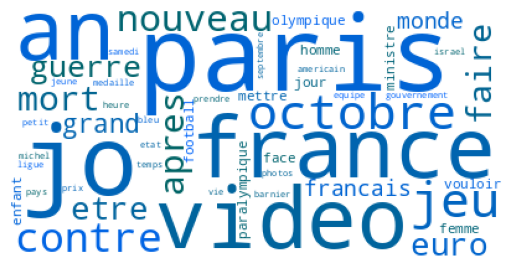

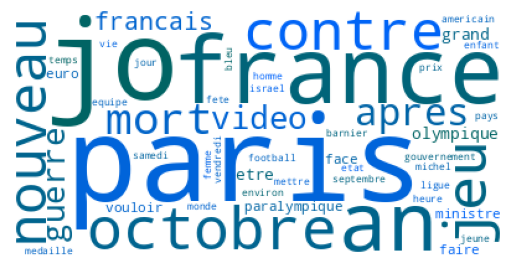

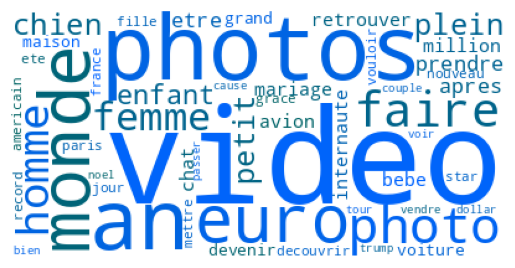

In [21]:
make_wordcloud(count_all)
make_wordcloud(count_neg)
make_wordcloud(count_pos)

In [22]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photos')

0

In [23]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photo')

195